In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from imblearn.over_sampling import SMOTE  # For imbalanced classes
import nltk
import re
nltk.download('stopwords')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

data = pd.read_csv('/content/dataset.csv')


In [ ]:

# Data Augmentation
if data['language'].value_counts().std() > data['language'].value_counts().mean():  # Check for imbalance
    sm = SMOTE(random_state=42)
    X_resampled, y_resampled = sm.fit_resample(data['Text'].values.reshape(-1, 1), data['language'])
    data['Text'] = X_resampled.ravel()
    data['language'] = y_resampled.ravel()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove non-alphanumeric characters
    tokens = text.split()
    filtered_words = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered_words)


In [ ]:
data['Text'] = data['Text'].apply(preprocess_text)


In [ ]:

corpus = data['Text']
X_train, X_test, y_train, y_test = train_test_split(corpus, data['language'], test_size=0.2, random_state=42)


In [ ]:
# Feature Engineering (consider n-grams or TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Try n-grams
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



In [ ]:
# Model Selection and Hyperparameter Tuning (consider GridSearchCV/RandomizedSearchCV)
model = MultinomialNB()

param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.8683834048640916


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[61  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [50  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0 59  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 66  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 57  2  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0 77  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [65  0  0  3  1  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 3  0  0  0  0  0  0  0  0 54  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0 51  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 63  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 54  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0 63  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

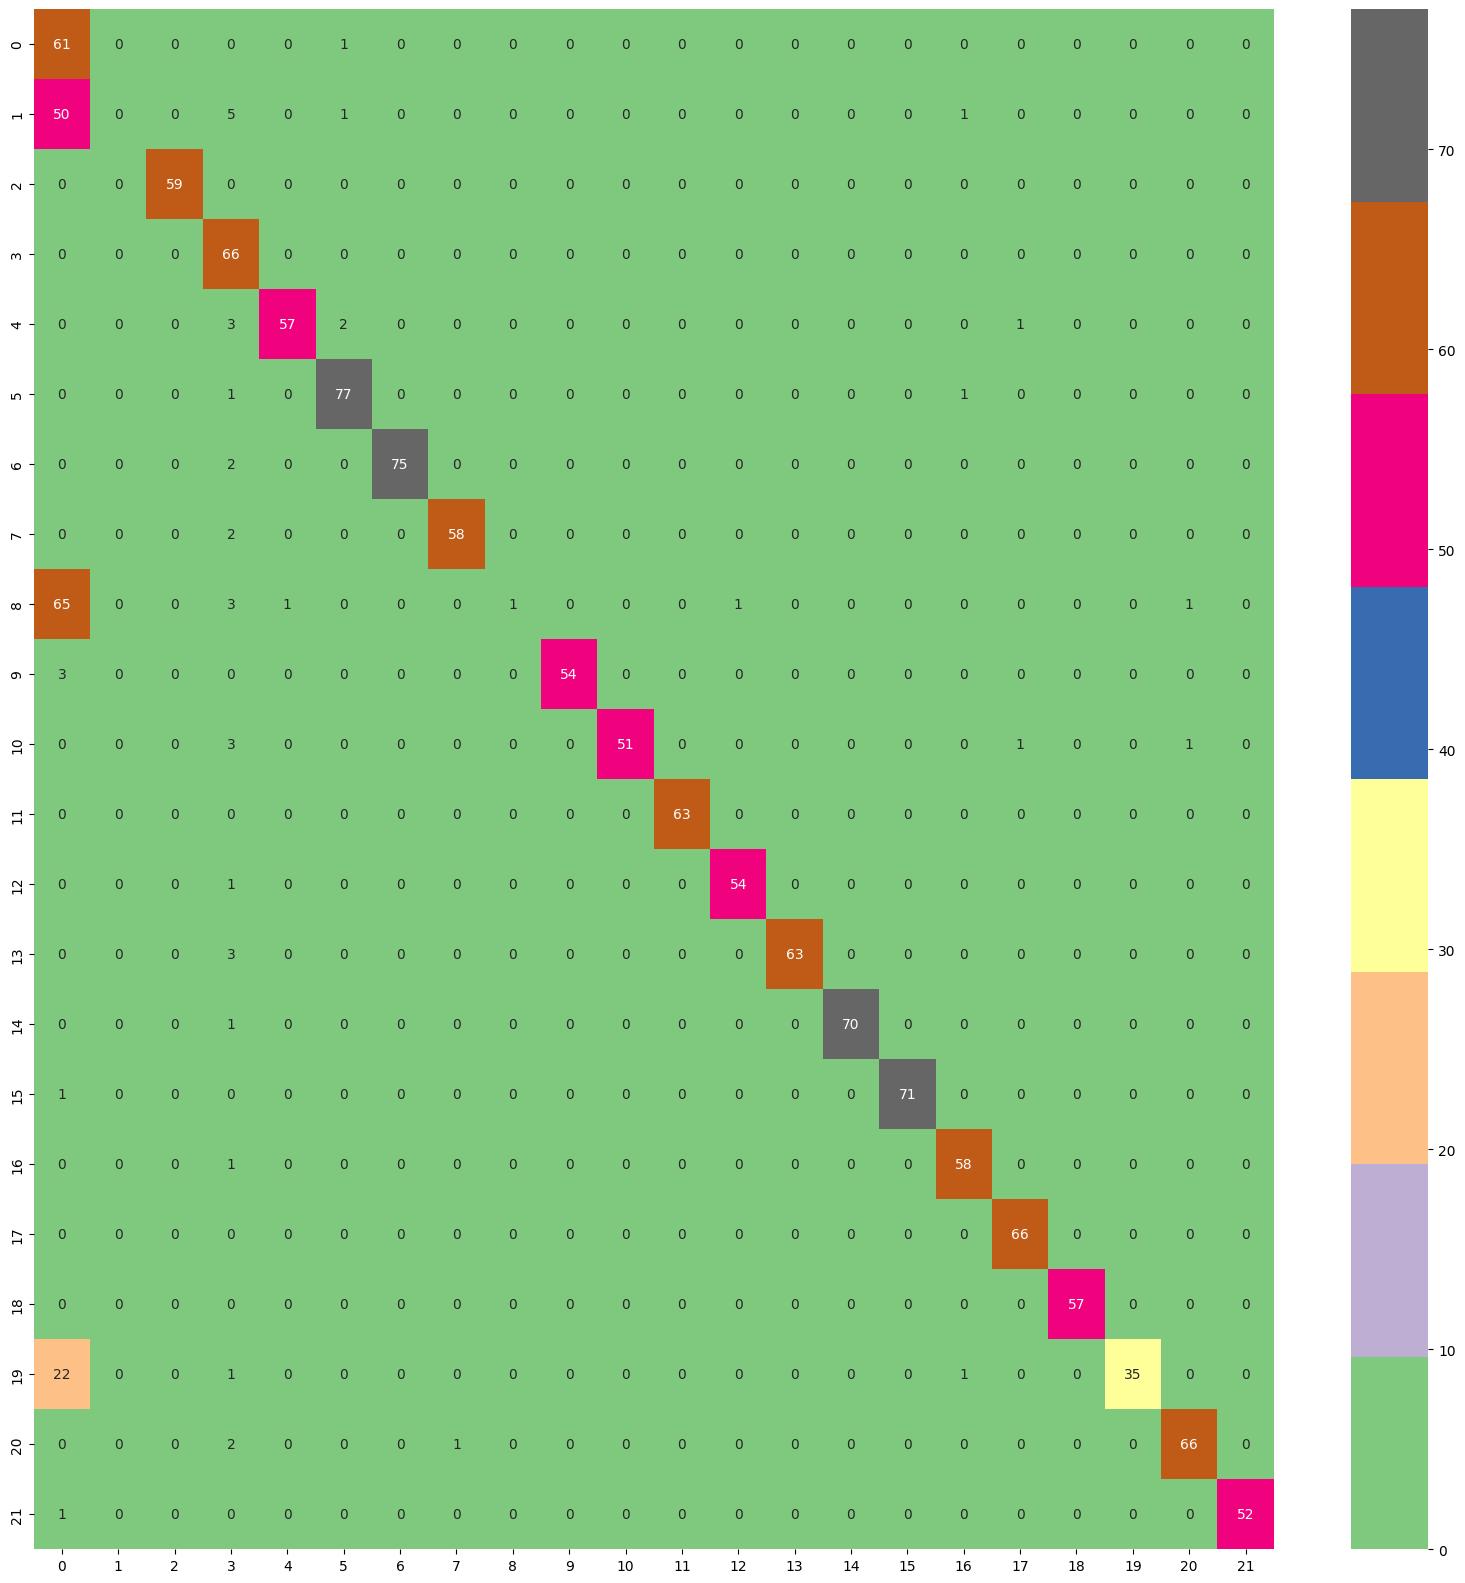

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

In [ ]:
fnl= pd.DataFrame(np.c_[pred,y_test],columns=['Predicted','Actual'])

In [ ]:
fnl

,Predicted,Actual
0,16,16
1,9,9
2,14,14
3,11,11
4,17,17
...,...,...
1393,3,14
1394,9,9
1395,5,5
1396,21,21


In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [ ]:
# Loading the saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [ ]:
# Testing the loaded model
new_text ='جستجوی اطلاعات جهان'
new_text_vectorized = vectorizer.transform([new_text])
predicted_label = loaded_model.predict(new_text_vectorized)
predicted_language = le.inverse_transform(predicted_label)[0]
print("Predicted language:", predicted_language)

Predicted language: Persian


In [ ]:
print(data['language'])


0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object
